In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/end-to-end-project/AQI_datasets/Air_Quality.csv")
df.columns = df.columns.str.lower()
df.head()

,date,city,co,no2,so2,o3,pm2.5,pm10,aqi
0,2025-01-01 00:00:00+00:00,Brasilia,325.0,21.1,2.5,35.0,15.4,15.6,20.483337
1,2025-01-01 01:00:00+00:00,Brasilia,369.0,20.8,2.7,35.0,15.1,15.3,20.425000
2,2025-01-01 02:00:00+00:00,Brasilia,419.0,20.4,3.0,34.0,15.6,15.8,20.333332
3,2025-01-01 03:00:00+00:00,Brasilia,451.0,20.5,3.1,33.0,16.4,16.6,20.258335
4,2025-01-01 04:00:00+00:00,Brasilia,458.0,22.1,3.0,29.0,17.7,17.8,20.316668


In [5]:
df.shape

(52560, 9)

In [6]:
df.isna().sum()

date     0
city     0
co       0
no2      0
so2      0
o3       0
pm2.5    0
pm10     0
aqi      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()
# Carbon Monoxide Concentration in µg/m³
# Nitrogen Dioxide Concentration in ppm
# Sulphur Dioxide Concentration in µg/m³
# Ozone Concentration in µg/m³
# Particulate Matter 2.5 Concentration in µg/m³
# Particulate Matter 10 Concentration in µg/m³
# Air Quality Index: 0 - 50: Good, 51 - 101: Moderate, 101 - 150: Slightly unhealthy


,co,no2,so2,o3,pm2.5,pm10,aqi
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,245.269711,24.129863,15.485135,64.416267,17.246579,28.553288,41.236672
std,146.926588,19.323853,24.794611,35.054135,15.429194,36.877058,22.740643
min,52.000000,0.000000,0.300000,0.000000,0.000000,0.000000,7.600000
25%,155.000000,9.400000,1.900000,41.000000,5.800000,7.600000,23.600002
50%,206.000000,18.900000,5.200000,60.000000,11.900000,14.400000,33.475001
75%,288.000000,33.700000,20.400000,84.000000,23.500000,33.900000,59.949994
max,1621.000000,127.100000,478.000000,288.000000,104.300000,470.300000,152.248350


<Axes: xlabel='aqi', ylabel='Count'>

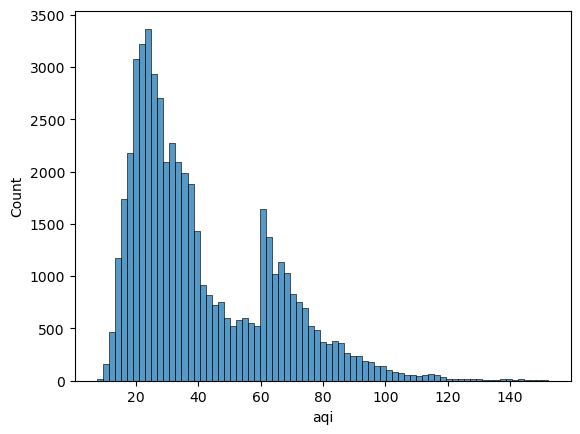

In [9]:
sns.histplot(x="aqi", data=df)

<Axes: xlabel='aqi'>

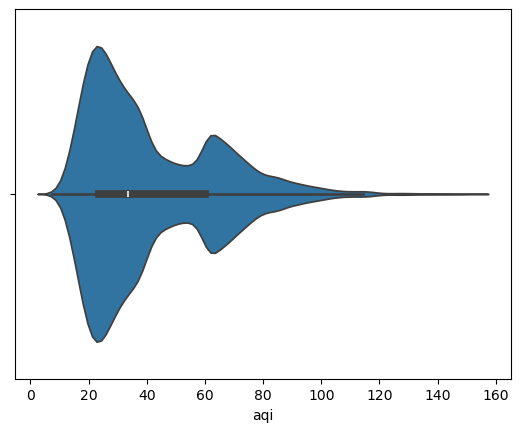

In [10]:
sns.violinplot(x="aqi", data=df)

<Axes: xlabel='co', ylabel='aqi'>

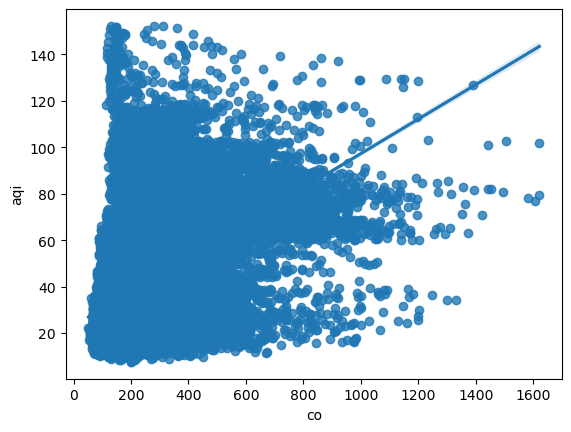

In [11]:
sns.regplot(x="co", y="aqi", data=df)

<Axes: xlabel='no2', ylabel='aqi'>

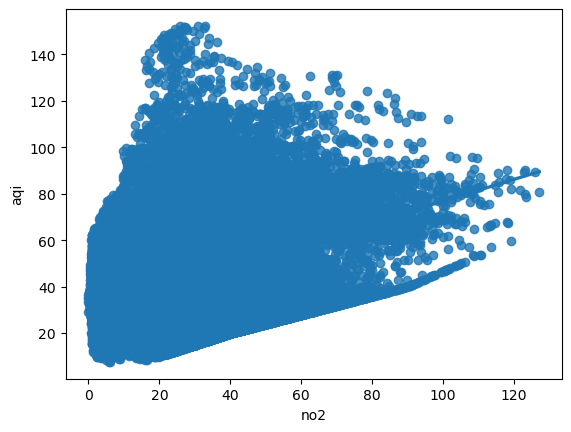

In [12]:
sns.regplot(x="no2", y="aqi", data=df)

# PM2.5 1 (fine particulate matter) — 🔥 MOST dangerous overall

### What it is: Tiny particles ≤2.5 micrometers (smoke, combustion, diesel, wildfire ash)

#### Why it’s bad:

- Penetrates deep into the lungs
- Enters the bloodstream
- Causes systemic inflammation

#### Linked to:

- Heart attacks
- Stroke
- Lung cancer
- Dementia
- All-cause mortality

#### Key point:
- There is no safe level. Risk increases linearly, even at very low concentrations.

#### WHO 24h guideline: ~15 µg/m³
- EPA “Moderate” AQI can already exceed WHO limits

➡️ This is the pollutant public health experts worry about most.

<Axes: xlabel='pm2.5', ylabel='aqi'>

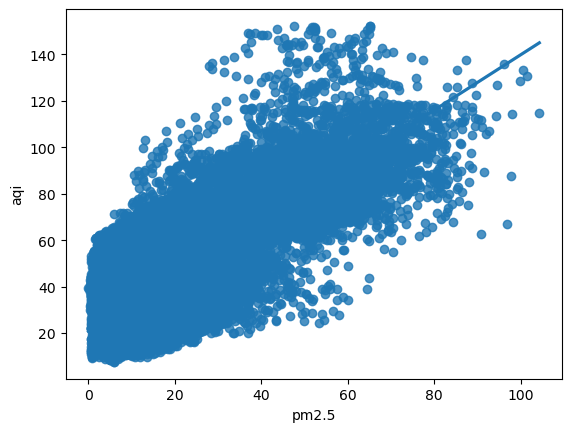

In [13]:
sns.regplot(x="pm2.5", y="aqi", data=df)

# “PM2.5 is most strongly correlated with AQI 
# AQI is often driven by PM2.5, and PM2.5 is worst because of its biological impact and lack of a safe threshold.”

For PM2.5, AQI “Moderate” roughly corresponds to:

- ~12–35 µg/m³ (24-hour mean)

Compare that to WHO guidance:
- WHO 24-hour guideline: ~15 µg/m³

<Axes: xlabel='pm2.5'>

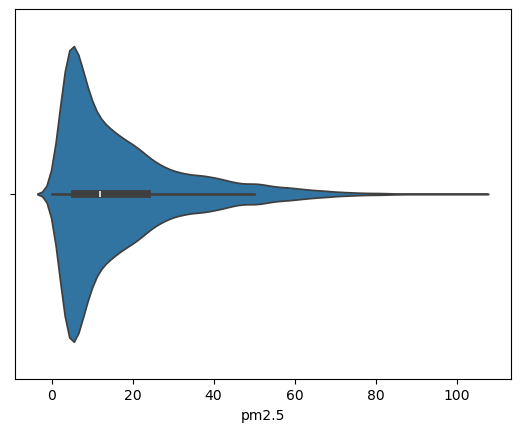

In [14]:
sns.violinplot(x="pm2.5", data=df)

<Axes: xlabel='pm2.5', ylabel='Count'>

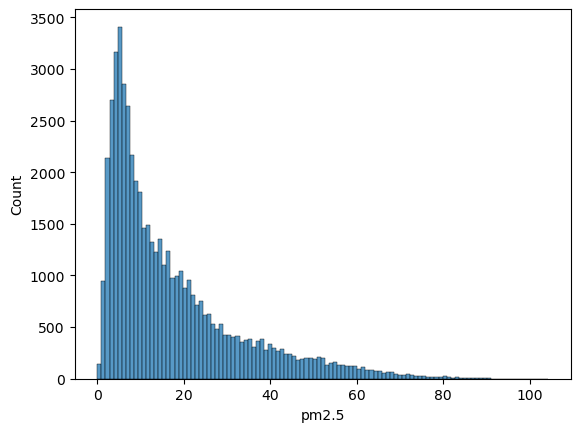

In [15]:
sns.histplot(x="pm2.5", data=df)

### Create PM2.5 bins based on WHO guidelines

In [16]:
bins = [0, 15, 25, 37.5, 50, 75, float('inf')]
labels = ['All Clear', 'Low Risk', 'Elevated', 'Significant', "High", "Very High"]
df['WHO_category'] = pd.cut(df['pm2.5'], bins=bins, labels=labels)

df["WHO_category"].value_counts()

WHO_category
All Clear      30705
Low Risk        9886
Elevated        5807
Significant     3357
High            2583
Very High        221
Name: count, dtype: int64

<Axes: xlabel='WHO_category', ylabel='Count'>

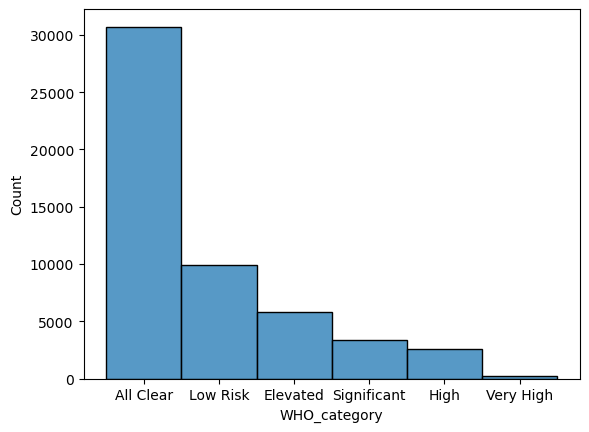

In [17]:
sns.histplot(x="WHO_category", data=df)

In [18]:
df["WHO_category"].value_counts().sum()

np.int64(52559)

<Axes: xlabel='pm10', ylabel='aqi'>

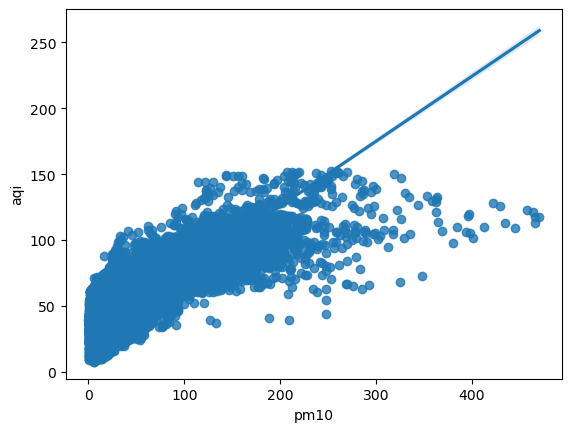

In [19]:
sns.regplot(x="pm10", y="aqi", data=df)

#### Create AQI bins based on U.S. EPA Air Quality Index (AQI) system for use as categories.

In [20]:
bins = [0, 50, 100, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy']
df['aqi_category'] = pd.cut(df['aqi'], bins=bins, labels=labels)

df["aqi_category"].value_counts()

aqi_category
Good         36602
Moderate     15127
Unhealthy      831
Name: count, dtype: int64

<Axes: xlabel='aqi_category', ylabel='Count'>

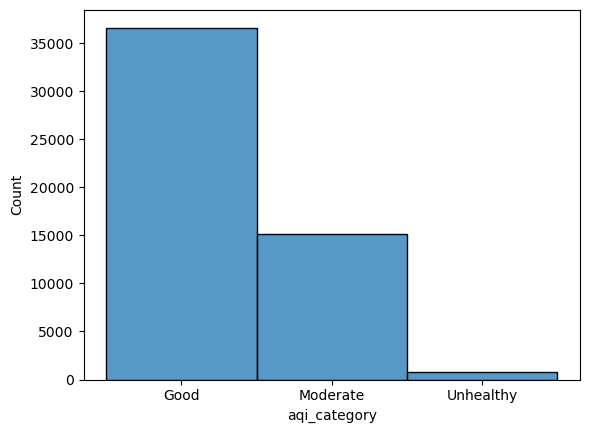

In [21]:
sns.histplot(x="aqi_category", data=df)

Text(0, 0.5, 'Number of Days')

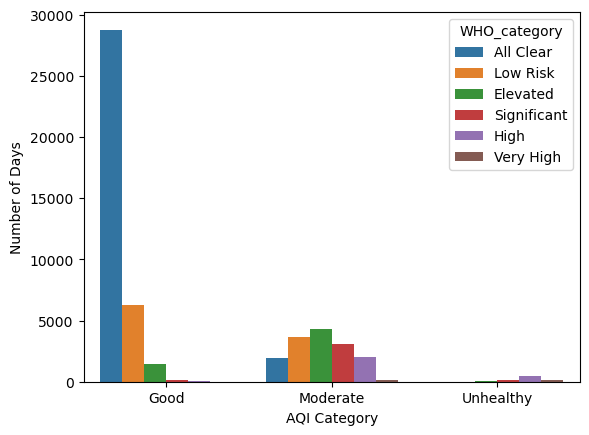

In [22]:
sns.countplot(x="aqi_category", hue="WHO_category", data=df)
plt.xlabel("AQI Category")
plt.ylabel("Number of Days")


- how many alerts do I want? more alerts mean more touchpoints... 
- All Clear: AQI Good AND PM2.5 low_risk
- Caution: AQI Good AND PM2.5 elevated+, OR AQI Moderate AND PM2.5 low_risk/elevated
- Warning: AQI Moderate with PM2.5 significant+, OR AQI Unhealthy

In [23]:
conditions = [
    (df["aqi_category"] == "Good") & (df["WHO_category"].isin(['All Clear', 'Low Risk'])) | (df["aqi_category"] == "Moderate") & (df["WHO_category"] == "All Clear"),  # All Clear
    ((df["aqi_category"] == "Good") & (df["WHO_category"].isin(['Elevated','Significant', 'High', 'Very High']))) | 
    ((df["aqi_category"] == "Moderate") & (df["WHO_category"].isin(["Low Risk", "Elevated"]))),  # Caution
    ((df["aqi_category"] == "Moderate") & (df["WHO_category"].isin(["Significant", "High", "Very High"]))) | (df["aqi_category"] == "Unhealthy")
]
choices = ['All Clear', 'Caution', 'Warning']

df['alert_level'] = np.select(conditions, choices, default='Unknown')
df['alert_level'].value_counts()

alert_level
All Clear    36940
Caution       9566
Warning       6053
Unknown          1
Name: count, dtype: int64

In [24]:
df = df[df['alert_level'] != 'Unknown'] # drop the unknown

<Axes: xlabel='alert_level', ylabel='Count'>

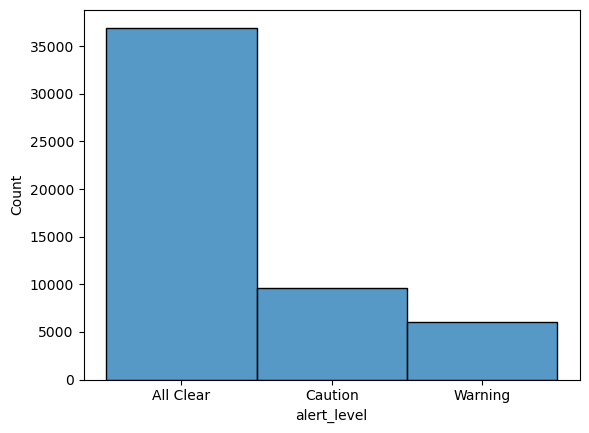

In [25]:
sns.histplot(x="alert_level", data=df)

In [26]:
df[df['alert_level'] == 'Unknown'][['aqi_category', 'WHO_category']].value_counts()

Series([], Name: count, dtype: int64)

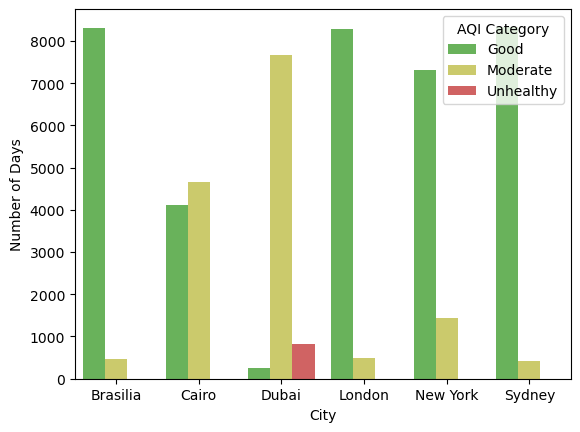

In [27]:
sns.countplot(x="city", hue="aqi_category", data=df, palette=["#5FC14C","#DBD95C", "#E25151"])
plt.xlabel("City")
plt.ylabel("Number of Days")
plt.legend(title="AQI Category")


In [29]:
df.to_csv('processed_aqi_data.csv', index=False)

- The business question: Creating an alert system that lets you know what kind of day it is. 
- Who might use it? People with alergies or other health conditions that need to breath safely. Other health concious folks who want to avoid bad air.
- Positive = Unealthy, Negative (no air issues) = Healthy
- False negative: Predict Good (no air issues) but is Unealthy
- False positive: predict Unealthy (no air issues) but is Healthy
- What are we trying to achieve? For us, a false negative is worse, because we don't want to tell users the air is safe when it is not.
- That menans we prioritize recall

# Baseline Logistic Regression: AQI Category Prediction

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["date", "city", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df["aqi_category"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        Good       0.95      0.91      0.93      7338
    Moderate       0.77      0.78      0.77      3005
   Unhealthy       0.32      0.91      0.47       169

    accuracy                           0.87     10512
   macro avg       0.68      0.86      0.72     10512
weighted avg       0.89      0.87      0.88     10512



# Baseline Logistic Regression: Alert Level (AQI + PM2.5 WHO Guidelines) Predictions

In [ ]:
X = df.drop(columns=["date", "city", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df["alert_level"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   All Clear       0.99      0.93      0.96      7390
     Caution       0.76      0.91      0.83      1948
     Warning       0.95      0.98      0.96      1174

    accuracy                           0.93     10512
   macro avg       0.90      0.94      0.92     10512
weighted avg       0.94      0.93      0.93     10512



In [ ]:
pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', ascending=False)

,feature,coefficient
0,co,-0.001249
2,so2,-0.006884
1,no2,-0.016978
3,o3,-0.028051
5,pm10,-0.042769
4,pm2.5,-0.495686


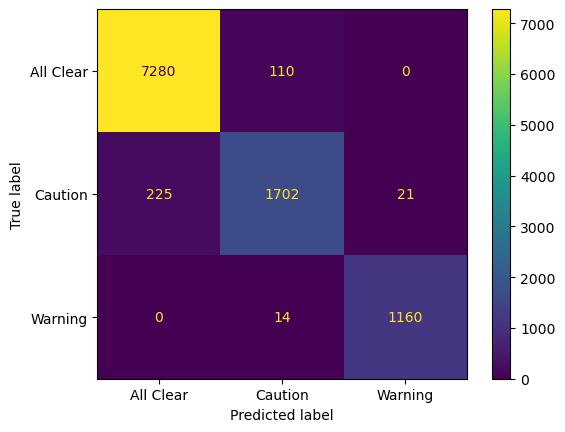

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()


# Random Forest: AQI Category

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["date", "city", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df["aqi_category"]


le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced',
                                max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        Good       0.97      0.90      0.93      7338
    Moderate       0.77      0.83      0.80      3005
   Unhealthy       0.33      0.90      0.48       169

    accuracy                           0.88     10512
   macro avg       0.69      0.88      0.74     10512
weighted avg       0.90      0.88      0.89     10512



# Random Forest: Alert Level

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["date", "city", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df["alert_level"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced',
                                max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   All Clear       0.99      0.91      0.95      7390
     Caution       0.73      0.96      0.83      1948
     Warning       0.98      0.99      0.98      1174

    accuracy                           0.93     10512
   macro avg       0.90      0.95      0.92     10512
weighted avg       0.94      0.93      0.93     10512



### Encode cities as numeric

In [ ]:
df_encoded = pd.get_dummies(df, columns=["city"])
df_encoded.head()

,date,co,no2,so2,o3,pm2.5,pm10,aqi,aqi_category,WHO_category,alert_level,city_Brasilia,city_Cairo,city_Dubai,city_London,city_New York,city_Sydney
0,2025-01-01 00:00:00+00:00,325.0,21.1,2.5,35.0,15.4,15.6,20.483337,Good,Low Risk,All Clear,True,False,False,False,False,False
1,2025-01-01 01:00:00+00:00,369.0,20.8,2.7,35.0,15.1,15.3,20.425000,Good,Low Risk,All Clear,True,False,False,False,False,False
2,2025-01-01 02:00:00+00:00,419.0,20.4,3.0,34.0,15.6,15.8,20.333332,Good,Low Risk,All Clear,True,False,False,False,False,False
3,2025-01-01 03:00:00+00:00,451.0,20.5,3.1,33.0,16.4,16.6,20.258335,Good,Low Risk,All Clear,True,False,False,False,False,False
4,2025-01-01 04:00:00+00:00,458.0,22.1,3.0,29.0,17.7,17.8,20.316668,Good,Low Risk,All Clear,True,False,False,False,False,False


In [ ]:
df_encoded.columns = df_encoded.columns.str.lower()

# Baseline with encoded cities

In [ ]:
X = df_encoded.drop(columns=["date", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df_encoded["alert_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95      7390
           1       0.76      0.92      0.83      1948
           2       0.95      0.98      0.96      1174

    accuracy                           0.93     10512
   macro avg       0.90      0.94      0.92     10512
weighted avg       0.94      0.93      0.93     10512



/opt/miniconda3/envs/end-to-end/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest: Alert Level + Cities Encoded (Best Model 🏆)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns=["date", "aqi_category", "aqi", "alert_level", 'WHO_category'])
y = df_encoded["alert_level"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   All Clear       0.97      0.99      0.98      7390
     Caution       0.94      0.88      0.91      1948
     Warning       0.99      0.99      0.99      1174

    accuracy                           0.97     10512
   macro avg       0.97      0.95      0.96     10512
weighted avg       0.97      0.97      0.97     10512



# Time Series Forecasting

### Convert to datetime

In [ ]:
df["date"].head()

0    2025-01-01 00:00:00+00:00
1    2025-01-01 01:00:00+00:00
2    2025-01-01 02:00:00+00:00
3    2025-01-01 03:00:00+00:00
4    2025-01-01 04:00:00+00:00
Name: date, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.date.head(20)

0    2025-01-01 00:00:00+00:00
1    2025-01-01 01:00:00+00:00
2    2025-01-01 02:00:00+00:00
3    2025-01-01 03:00:00+00:00
4    2025-01-01 04:00:00+00:00
5    2025-01-01 05:00:00+00:00
6    2025-01-01 06:00:00+00:00
7    2025-01-01 07:00:00+00:00
8    2025-01-01 08:00:00+00:00
9    2025-01-01 09:00:00+00:00
10   2025-01-01 10:00:00+00:00
11   2025-01-01 11:00:00+00:00
12   2025-01-01 12:00:00+00:00
13   2025-01-01 13:00:00+00:00
14   2025-01-01 14:00:00+00:00
15   2025-01-01 15:00:00+00:00
16   2025-01-01 16:00:00+00:00
17   2025-01-01 17:00:00+00:00
18   2025-01-01 18:00:00+00:00
19   2025-01-01 19:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [ ]:
df.date.min()

Timestamp('2025-01-01 00:00:00+0000', tz='UTC')

In [ ]:
df.date.max()

Timestamp('2025-12-31 23:00:00+0000', tz='UTC')

In [ ]:
df['date'].isna().sum()

np.int64(0)

### Filter to Dubai

<Axes: xlabel='date', ylabel='aqi'>

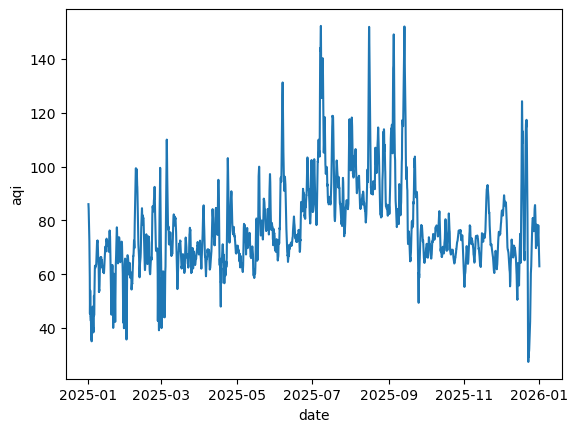

In [ ]:
# filter to Dubai, # sort by date 
dubai = df[df["city"] == "Dubai"].sort_values("date").copy()

sns.lineplot(x="date", y="aqi", data=dubai)

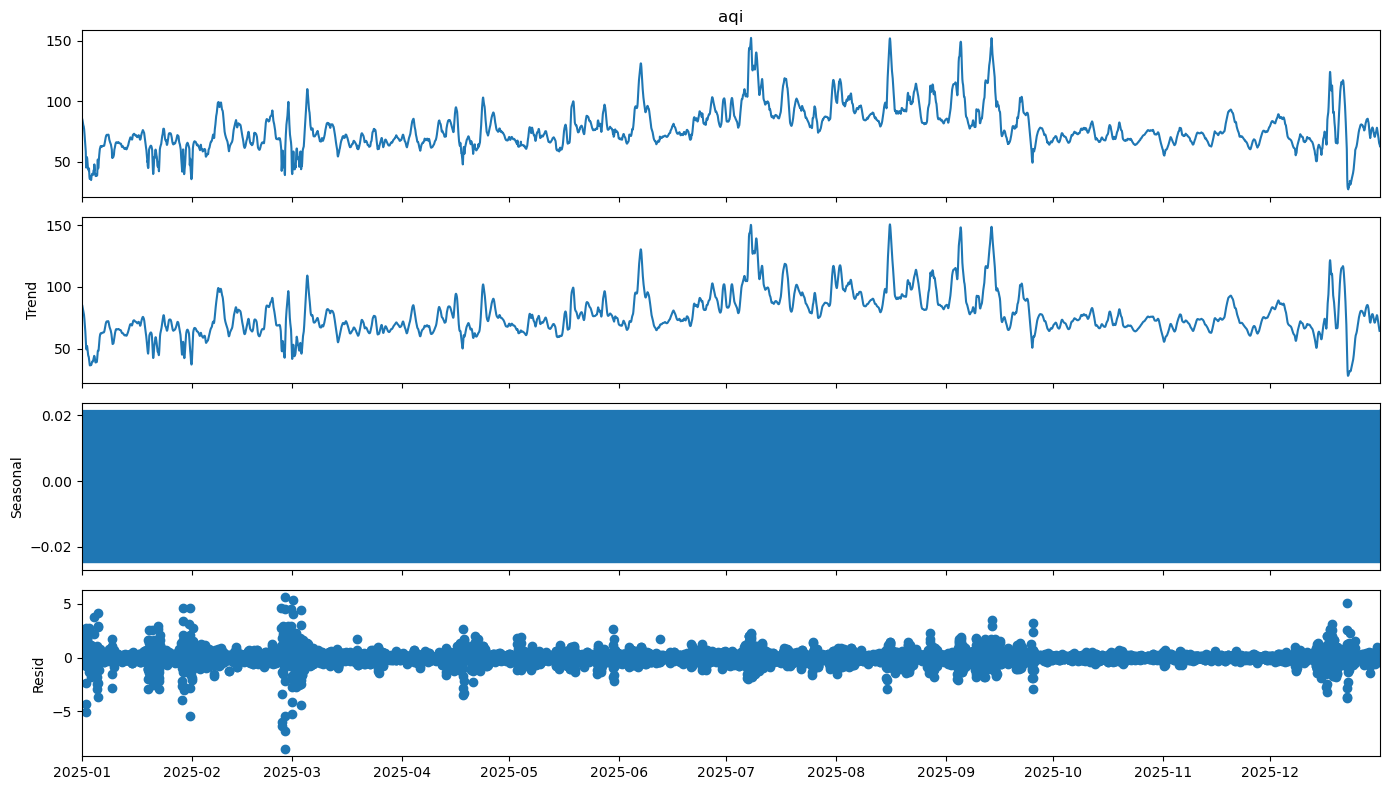

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Set the date as the index
dubai = dubai.set_index('date')
# Run seasonal_decompose() on the AQI column

result = seasonal_decompose(dubai['aqi'], period=7)

# Plot the result

result.plot()
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()


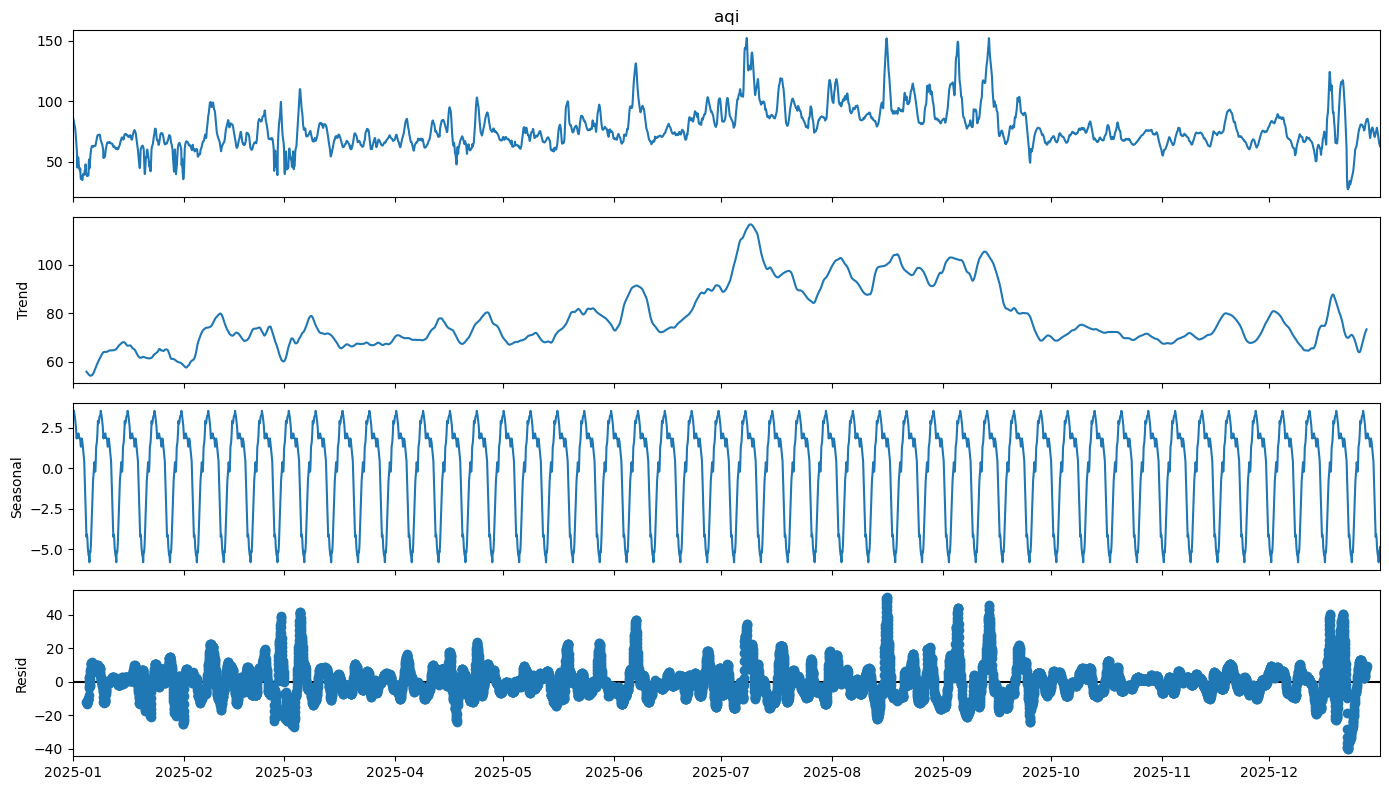

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Set the date as the index
dubai = dubai.set_index('date')
# Run seasonal_decompose() on the AQI column

result = seasonal_decompose(dubai['aqi'], period=180)

# Plot the result

result.plot()
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()

### Create lag features to predict tomorrow's AQI

In [ ]:
# resample daily averages
# groups by day and takes the mean of all numeric colums
dubai_daily = dubai.drop(columns=['aqi_category', 'city']).resample('D').mean()
dubai_daily.head()

,co,no2,so2,o3,pm2.5,pm10,aqi,aqi_lag_1,aqi_lag_7
date,,,,,,,,,
2025-01-01 00:00:00+00:00,320.583333,35.212500,19.991667,69.208333,28.254167,50.575000,77.825137,NaN,NaN
2025-01-02 00:00:00+00:00,250.541667,9.191667,6.395833,110.583333,11.783333,20.295833,49.692501,NaN,NaN
2025-01-03 00:00:00+00:00,305.541667,17.912500,10.045833,87.791667,18.637500,39.512500,38.236978,NaN,NaN
2025-01-04 00:00:00+00:00,329.125000,33.212500,20.300000,75.750000,19.775000,26.445833,41.307810,NaN,NaN
2025-01-05 00:00:00+00:00,493.500000,30.079167,19.133333,92.875000,25.258333,30.916667,46.805209,NaN,NaN


In [ ]:
dubai_daily["aqi_lag_1"] = dubai_daily['aqi'].shift(1)
dubai_daily.head(10)

# yesterday

,co,no2,so2,o3,pm2.5,pm10,aqi,aqi_lag_1,aqi_lag_7
date,,,,,,,,,
2025-01-01 00:00:00+00:00,320.583333,35.212500,19.991667,69.208333,28.254167,50.575000,77.825137,NaN,NaN
2025-01-02 00:00:00+00:00,250.541667,9.191667,6.395833,110.583333,11.783333,20.295833,49.692501,77.825137,NaN
2025-01-03 00:00:00+00:00,305.541667,17.912500,10.045833,87.791667,18.637500,39.512500,38.236978,49.692501,NaN
2025-01-04 00:00:00+00:00,329.125000,33.212500,20.300000,75.750000,19.775000,26.445833,41.307810,38.236978,NaN
2025-01-05 00:00:00+00:00,493.500000,30.079167,19.133333,92.875000,25.258333,30.916667,46.805209,41.307810,NaN
2025-01-06 00:00:00+00:00,321.708333,48.845833,23.370833,60.166667,28.925000,51.962500,62.506386,46.805209,NaN
2025-01-07 00:00:00+00:00,456.750000,65.733333,29.250000,34.625000,40.516667,60.762500,67.166387,62.506386,NaN
2025-01-08 00:00:00+00:00,498.833333,46.983333,25.766667,57.541667,32.175000,45.666667,70.417778,67.166387,77.825137
2025-01-09 00:00:00+00:00,487.791667,29.837500,15.750000,84.083333,23.975000,35.900000,58.493333,70.417778,49.692501


In [ ]:
dubai_daily["aqi_lag_7"] = dubai_daily['aqi'].shift(7)
dubai_daily.head(10)

# a week ago

,co,no2,so2,o3,pm2.5,pm10,aqi,aqi_lag_1,aqi_lag_7
date,,,,,,,,,
2025-01-01 00:00:00+00:00,320.583333,35.212500,19.991667,69.208333,28.254167,50.575000,77.825137,NaN,NaN
2025-01-02 00:00:00+00:00,250.541667,9.191667,6.395833,110.583333,11.783333,20.295833,49.692501,77.825137,NaN
2025-01-03 00:00:00+00:00,305.541667,17.912500,10.045833,87.791667,18.637500,39.512500,38.236978,49.692501,NaN
2025-01-04 00:00:00+00:00,329.125000,33.212500,20.300000,75.750000,19.775000,26.445833,41.307810,38.236978,NaN
2025-01-05 00:00:00+00:00,493.500000,30.079167,19.133333,92.875000,25.258333,30.916667,46.805209,41.307810,NaN
2025-01-06 00:00:00+00:00,321.708333,48.845833,23.370833,60.166667,28.925000,51.962500,62.506386,46.805209,NaN
2025-01-07 00:00:00+00:00,456.750000,65.733333,29.250000,34.625000,40.516667,60.762500,67.166387,62.506386,NaN
2025-01-08 00:00:00+00:00,498.833333,46.983333,25.766667,57.541667,32.175000,45.666667,70.417778,67.166387,77.825137
2025-01-09 00:00:00+00:00,487.791667,29.837500,15.750000,84.083333,23.975000,35.900000,58.493333,70.417778,49.692501


In [ ]:
dubai_daily['aqi_rolling_7'] = dubai_daily['aqi'].rolling(7).mean()
dubai_daily.head(10)
# rolling average — the average of the last 7 days.

,co,no2,so2,o3,pm2.5,pm10,aqi,aqi_lag_1,aqi_lag_7,aqi_rolling_7
date,,,,,,,,,,
2025-01-01 00:00:00+00:00,320.583333,35.212500,19.991667,69.208333,28.254167,50.575000,77.825137,NaN,NaN,NaN
2025-01-02 00:00:00+00:00,250.541667,9.191667,6.395833,110.583333,11.783333,20.295833,49.692501,77.825137,NaN,NaN
2025-01-03 00:00:00+00:00,305.541667,17.912500,10.045833,87.791667,18.637500,39.512500,38.236978,49.692501,NaN,NaN
2025-01-04 00:00:00+00:00,329.125000,33.212500,20.300000,75.750000,19.775000,26.445833,41.307810,38.236978,NaN,NaN
2025-01-05 00:00:00+00:00,493.500000,30.079167,19.133333,92.875000,25.258333,30.916667,46.805209,41.307810,NaN,NaN
2025-01-06 00:00:00+00:00,321.708333,48.845833,23.370833,60.166667,28.925000,51.962500,62.506386,46.805209,NaN,NaN
2025-01-07 00:00:00+00:00,456.750000,65.733333,29.250000,34.625000,40.516667,60.762500,67.166387,62.506386,NaN,54.791487
2025-01-08 00:00:00+00:00,498.833333,46.983333,25.766667,57.541667,32.175000,45.666667,70.417778,67.166387,77.825137,53.733293
2025-01-09 00:00:00+00:00,487.791667,29.837500,15.750000,84.083333,23.975000,35.900000,58.493333,70.417778,49.692501,54.990555


### Create target variable: tomorrow's AQI category 

In [ ]:
bins = [0, 50, 100, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy']
dubai_daily['aqi_category'] = pd.cut(dubai_daily['aqi'], bins=bins, labels=labels)

dubai_daily['tomorrow_category'] = dubai_daily['aqi_category'].shift(-1)

In [ ]:
# 1. define split point (80% of rows)
split_point = int(len(dubai_daily)* 0.8)

# 2. dropna before split 

dubai_daily = dubai_daily.dropna()

# 3. split data by time (not random)
train = dubai_daily.iloc[:split_point]
test = dubai_daily.iloc[split_point:]


# 4. define X and y for train and test

X_train = train.drop(columns=["co", "no2", "so2", "o3", "pm2.5", "pm10", "aqi_category", "tomorrow_category"])
y_train = train["tomorrow_category"].astype(str)
X_test = test.drop(columns=["co", "no2", "so2", "o3", "pm2.5", "pm10", "aqi_category", "tomorrow_category"])
y_test = test["tomorrow_category"].astype(str)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        Good       0.05      0.50      0.09         2
    Moderate       0.98      0.68      0.80        68
   Unhealthy       0.40      1.00      0.57         2

    accuracy                           0.68        72
   macro avg       0.48      0.73      0.49        72
weighted avg       0.94      0.68      0.77        72



## Time Series prediction outcome

- can forecast whether tomorrow will be Good/Moderate/Unhealthy with ~68% accuracy
- can catch 100% of unhealthy days

# Alert Level Time Series (All Cities)

In [ ]:
# Prepare data for all cities
df_ts = df.copy()
df_ts = df_ts.set_index("date")

# Resample numeric features by city and day
daily_numeric = df_ts.groupby("city").resample('D').agg({
    'co': 'mean',
    'no2': 'mean', 
    'so2': 'mean',
    'o3': 'mean',
    'pm2.5': 'mean',
    'pm10': 'mean',
    'aqi': 'mean'
}).reset_index()

# For alert level, take the worst (max) per city per day
daily_alert = df_ts.groupby("city").resample('D')['alert_level'].max().reset_index()

# Merge numeric and alert data
all_cities_daily = daily_numeric.merge(daily_alert, on=['city', 'date'])

all_cities_daily.head(10)

,city,date,co,no2,so2,o3,pm2.5,pm10,aqi,alert_level
0,Brasilia,2025-01-01 00:00:00+00:00,302.416667,11.929167,1.850000,56.000000,12.812500,12.962500,26.796876,All Clear
1,Brasilia,2025-01-02 00:00:00+00:00,228.333333,7.837500,1.862500,61.375000,8.654167,8.845833,28.231598,All Clear
2,Brasilia,2025-01-03 00:00:00+00:00,262.500000,15.066667,2.041667,61.583333,10.883333,11.162500,27.715625,All Clear
3,Brasilia,2025-01-04 00:00:00+00:00,394.375000,13.375000,1.929167,63.625000,9.970833,10.120833,30.141319,All Clear
4,Brasilia,2025-01-05 00:00:00+00:00,325.958333,14.425000,2.812500,69.333333,12.870833,13.187500,31.836529,All Clear
5,Brasilia,2025-01-06 00:00:00+00:00,292.333333,8.254167,2.245833,68.958333,12.900000,13.095833,29.004167,All Clear
6,Brasilia,2025-01-07 00:00:00+00:00,360.916667,12.750000,1.825000,53.250000,11.954167,12.050000,28.407639,All Clear
7,Brasilia,2025-01-08 00:00:00+00:00,246.916667,4.245833,0.875000,58.958333,6.850000,6.920833,24.128472,All Clear
8,Brasilia,2025-01-09 00:00:00+00:00,249.666667,4.216667,1.033333,42.583333,3.408333,3.420833,17.054167,All Clear
9,Brasilia,2025-01-10 00:00:00+00:00,244.458333,4.354167,0.941667,32.791667,4.141667,4.166667,13.116667,All Clear


In [ ]:
# Check alert level distribution across all cities
all_cities_daily.groupby('city')['alert_level'].value_counts().unstack(fill_value=0)

alert_level,All Clear,Caution,Warning
city,,,
Brasilia,353,12,0
Cairo,36,214,115
Dubai,2,39,324
London,312,39,14
New York,200,139,26
Sydney,299,64,2


In [ ]:
# Create lag features per city (grouped)
# Sort by city and date to ensure proper ordering
all_cities_daily = all_cities_daily.sort_values(['city', 'date'])

# Create lag features within each city group
all_cities_daily['alert_lag_1'] = all_cities_daily.groupby('city')['alert_level'].shift(1)
all_cities_daily['tomorrow_alert'] = all_cities_daily.groupby('city')['alert_level'].shift(-1)
all_cities_daily['aqi_lag_1'] = all_cities_daily.groupby('city')['aqi'].shift(1)
all_cities_daily['aqi_lag_7'] = all_cities_daily.groupby('city')['aqi'].shift(7)
all_cities_daily['aqi_rolling_7'] = all_cities_daily.groupby('city')['aqi'].transform(lambda x: x.rolling(7).mean())

all_cities_daily.head(10)

,city,date,co,no2,so2,o3,pm2.5,pm10,aqi,alert_level,alert_lag_1,tomorrow_alert,aqi_lag_1,aqi_lag_7,aqi_rolling_7
0,Brasilia,2025-01-01 00:00:00+00:00,302.416667,11.929167,1.850000,56.000000,12.812500,12.962500,26.796876,All Clear,NaN,All Clear,NaN,NaN,NaN
1,Brasilia,2025-01-02 00:00:00+00:00,228.333333,7.837500,1.862500,61.375000,8.654167,8.845833,28.231598,All Clear,All Clear,All Clear,26.796876,NaN,NaN
2,Brasilia,2025-01-03 00:00:00+00:00,262.500000,15.066667,2.041667,61.583333,10.883333,11.162500,27.715625,All Clear,All Clear,All Clear,28.231598,NaN,NaN
3,Brasilia,2025-01-04 00:00:00+00:00,394.375000,13.375000,1.929167,63.625000,9.970833,10.120833,30.141319,All Clear,All Clear,All Clear,27.715625,NaN,NaN
4,Brasilia,2025-01-05 00:00:00+00:00,325.958333,14.425000,2.812500,69.333333,12.870833,13.187500,31.836529,All Clear,All Clear,All Clear,30.141319,NaN,NaN
5,Brasilia,2025-01-06 00:00:00+00:00,292.333333,8.254167,2.245833,68.958333,12.900000,13.095833,29.004167,All Clear,All Clear,All Clear,31.836529,NaN,NaN
6,Brasilia,2025-01-07 00:00:00+00:00,360.916667,12.750000,1.825000,53.250000,11.954167,12.050000,28.407639,All Clear,All Clear,All Clear,29.004167,NaN,28.876251
7,Brasilia,2025-01-08 00:00:00+00:00,246.916667,4.245833,0.875000,58.958333,6.850000,6.920833,24.128472,All Clear,All Clear,All Clear,28.407639,26.796876,28.495050
8,Brasilia,2025-01-09 00:00:00+00:00,249.666667,4.216667,1.033333,42.583333,3.408333,3.420833,17.054167,All Clear,All Clear,All Clear,24.128472,28.231598,26.898274
9,Brasilia,2025-01-10 00:00:00+00:00,244.458333,4.354167,0.941667,32.791667,4.141667,4.166667,13.116667,All Clear,All Clear,All Clear,17.054167,27.715625,24.812709


In [ ]:
# Logistic Regression: Alert Level Time Series (All Cities)

# Fresh copy to avoid issues from re-running
all_cities_ts = all_cities_daily.copy()

# Drop rows with NaN (from lag features)
all_cities_ts = all_cities_ts.dropna()

# Encode target variable
le = LabelEncoder()
le.fit(all_cities_ts['tomorrow_alert'].astype(str))
all_cities_ts['tomorrow_alert_encoded'] = le.transform(all_cities_ts['tomorrow_alert'].astype(str))

# Encode categorical features
le_alert = LabelEncoder()
le_alert.fit(all_cities_ts['alert_level'].astype(str))
all_cities_ts['alert_lag_1_encoded'] = le_alert.transform(all_cities_ts['alert_lag_1'].astype(str))
all_cities_ts['alert_level_encoded'] = le_alert.transform(all_cities_ts['alert_level'].astype(str))

# One-hot encode cities
all_cities_ts = pd.get_dummies(all_cities_ts, columns=['city'])

# Time-based split (80/20)
split_point = int(len(all_cities_ts) * 0.8)
train = all_cities_ts.iloc[:split_point]
test = all_cities_ts.iloc[split_point:]

# Define features to drop
columns_to_drop = ["date", "co", "no2", "so2", "o3", "pm2.5", "pm10", 
                   "tomorrow_alert", "tomorrow_alert_encoded",
                   "alert_level", "alert_lag_1"]

X_train = train.drop(columns=columns_to_drop)
y_train = train["tomorrow_alert_encoded"]
X_test = test.drop(columns=columns_to_drop)
y_test = test["tomorrow_alert_encoded"]

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Features: {list(X_train.columns)}")

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred, labels=range(len(le.classes_)), target_names=le.classes_, zero_division=0))

Training samples: 1713, Test samples: 429
Features: ['aqi', 'aqi_lag_1', 'aqi_lag_7', 'aqi_rolling_7', 'alert_lag_1_encoded', 'alert_level_encoded', 'city_Brasilia', 'city_Cairo', 'city_Dubai', 'city_London', 'city_New York', 'city_Sydney']

Logistic Regression Results:
              precision    recall  f1-score   support

   All Clear       0.81      0.82      0.82       334
     Caution       0.29      0.28      0.28        90
     Warning       0.00      0.00      0.00         5

    accuracy                           0.70       429
   macro avg       0.37      0.37      0.37       429
weighted avg       0.69      0.70      0.69       429



/opt/miniconda3/envs/end-to-end/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest: Alert Level Time Series (All Cities)

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf, labels=range(len(le.classes_)), target_names=le.classes_, zero_division=0))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop Feature Importances:")
print(feature_importance.head(10))

Random Forest Results:
              precision    recall  f1-score   support

   All Clear       0.80      0.95      0.87       334
     Caution       0.38      0.13      0.20        90
     Warning       0.00      0.00      0.00         5

    accuracy                           0.76       429
   macro avg       0.39      0.36      0.35       429
weighted avg       0.70      0.76      0.72       429


Top Feature Importances:
                feature  importance
0                   aqi    0.204160
3         aqi_rolling_7    0.189792
1             aqi_lag_1    0.166353
5   alert_level_encoded    0.150777
2             aqi_lag_7    0.130501
8            city_Dubai    0.044441
4   alert_lag_1_encoded    0.041976
7            city_Cairo    0.026716
10        city_New York    0.018679
6         city_Brasilia    0.015776


In [ ]:
# Confusion Matrix for Random Forest Time Series
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest Time Series - All Cities")
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values